# Explore here

In [18]:
# Handle import up-front
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score


In [19]:
import pandas as pd

# Load the data
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
data = pd.read_csv(url)

# Display first few rows of the dataframe
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [22]:
# Separate features from labels
labels=data['polarity']
features=data.drop('polarity', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=315
)

In [23]:
# Get just the reviews from the training data
training_reviews=training_features['review']

# Fit the vectorizer and transform the training reviews into word counts
vec_model=CountVectorizer(stop_words="english")
training_word_counts=vec_model.fit_transform(training_reviews).toarray()

print(f'Word count matrix has {training_word_counts.shape[0]} rows and {training_word_counts.shape[1]} columns')

Word count matrix has 668 rows and 3151 columns


In [25]:
# Define the model
model=MultinomialNB()

# Cross-validate the model
scores=cross_val_score(model, training_word_counts, training_labels)

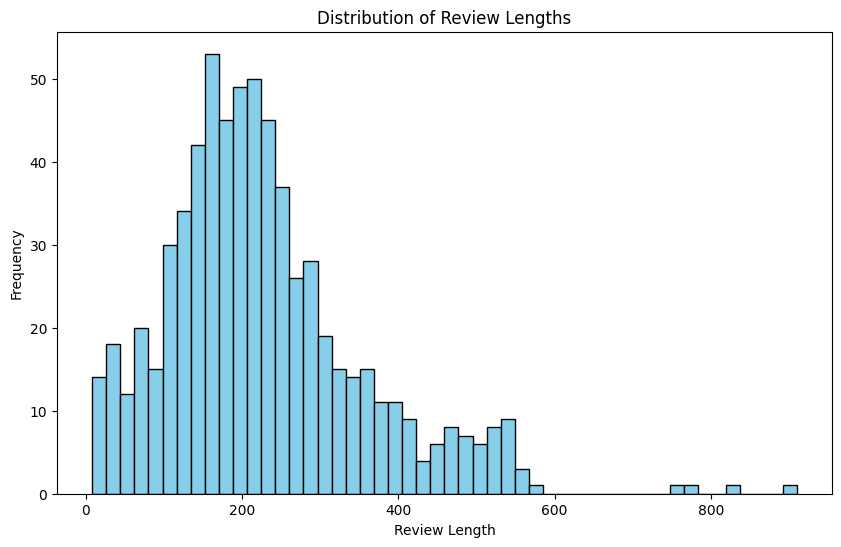

Word count matrix has 668 rows and 3151 columns
Cross-validation scores: [0.76865672 0.85820896 0.75373134 0.83458647 0.81203008]


In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the length of each review
review_lengths = training_reviews.apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Fit the vectorizer and transform the training reviews into word counts
vec_model = CountVectorizer(stop_words="english")
training_word_counts = vec_model.fit_transform(training_reviews).toarray()

print(f'Word count matrix has {training_word_counts.shape[0]} rows and {training_word_counts.shape[1]} columns')

# Define the model
model = MultinomialNB()

# Cross-validate the model
scores = cross_val_score(model, training_word_counts, training_labels)
print(f'Cross-validation scores: {scores}')


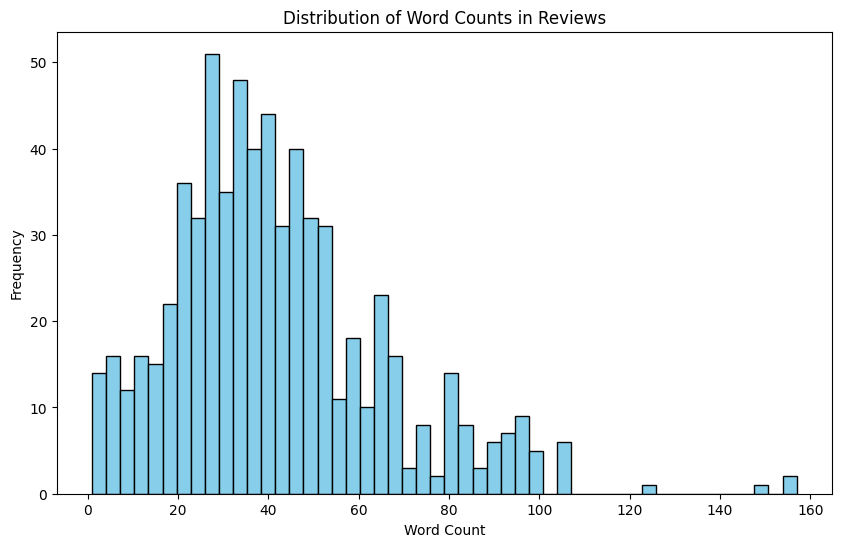

In [27]:
import matplotlib.pyplot as plt

# Calculate the word count for each review
word_counts = training_reviews.apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [28]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
import numpy as np

# Fit the vectorizer and transform the training reviews into word counts
vec_model = CountVectorizer(stop_words="english")
training_word_counts = vec_model.fit_transform(training_reviews).toarray()
testing_word_counts = vec_model.transform(testing_features['review']).toarray()

# Models to train
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(training_word_counts, training_labels)

    # Evaluate the model
    scores = cross_val_score(model, training_word_counts, training_labels, cv=5)
    print(f'{name} Cross-Validation Accuracy: {np.mean(scores):.4f}')

    # Predict on testing data
    predictions = model.predict(testing_word_counts)
    print(f'{name} Test Accuracy: {model.score(testing_word_counts, testing_labels):.4f}')
    print('-------------------------------------------')


GaussianNB Cross-Validation Accuracy: 0.7500
GaussianNB Test Accuracy: 0.7534
-------------------------------------------
MultinomialNB Cross-Validation Accuracy: 0.8054
MultinomialNB Test Accuracy: 0.7713
-------------------------------------------
BernoulliNB Cross-Validation Accuracy: 0.7470
BernoulliNB Test Accuracy: 0.7265
-------------------------------------------


GaussianNB Cross-Validation Accuracy: 0.7500
GaussianNB Test Accuracy: 0.7534
GaussianNB Test Precision: 0.7480
-------------------------------------------
MultinomialNB Cross-Validation Accuracy: 0.8054
MultinomialNB Test Accuracy: 0.7713
MultinomialNB Test Precision: 0.7671
-------------------------------------------
BernoulliNB Cross-Validation Accuracy: 0.7470
BernoulliNB Test Accuracy: 0.7265
BernoulliNB Test Precision: 0.7317
-------------------------------------------


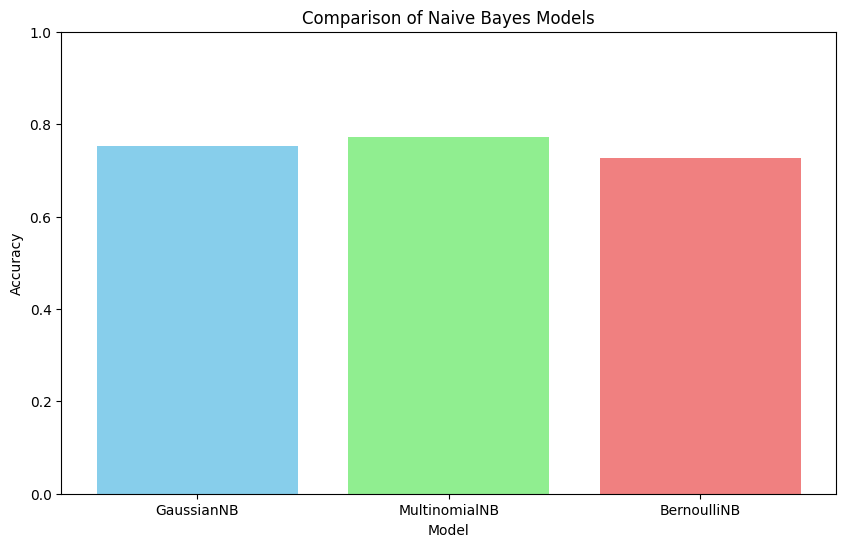

In [30]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the models
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

# Train, evaluate, and compare the models
for name, model in models.items():
    # Train the model
    model.fit(training_word_counts, training_labels)
    
    # Cross-validation
    cv_scores = cross_val_score(model, training_word_counts, training_labels, cv=5)
    print(f'{name} Cross-Validation Accuracy: {cv_scores.mean():.4f}')
    
    # Predictions on testing data
    predictions = model.predict(testing_word_counts)
    
    # Evaluation metrics
    accuracy = accuracy_score(testing_labels, predictions)
    precision = precision_score(testing_labels, predictions, average='weighted')
    recall = recall_score(testing_labels, predictions, average='weighted')
    f1 = f1_score(testing_labels, predictions, average='weighted')
    
    # Print the evaluation metrics
    print(f'{name} Test Accuracy: {accuracy:.4f}')
    print(f'{name} Test Precision: {precision:.4f}')

    print('-------------------------------------------')

# Visualization of results (if desired)
import matplotlib.pyplot as plt

model_names = list(models.keys())
accuracies = [accuracy_score(testing_labels, models[name].predict(testing_word_counts)) for name in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Naive Bayes Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

